<a href="https://colab.research.google.com/github/tomtmot/20220702_python/blob/main/20220730_Tom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!unzip model.zip 

Archive:  model.zip
replace keras_model.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: keras_model.h5          
replace labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: labels.txt              


In [24]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open("Tom.jpg")
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.90173244 0.09826753]]


#使用Grdio打包上面的模型來使用

In [ ]:
!pip install gradio

In [31]:
def classify(image):
  model = load_model('keras_model.h5')

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  # Replace this with the path to your image
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  labels=["帶著口罩Tom","沒戴口罩Tom"]
  return labels[np.argmax(prediction)]  #找出最大機率在labels裡的index

In [32]:
import gradio as gr


In [33]:
gr.Interface(classify, inputs=gr.Image(type="pil"), outputs="text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://57510.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f8279911c90>,
 'http://127.0.0.1:7864/',
 'https://57510.gradio.app')

In [35]:
x=[1,2,3]

In [36]:
np.argmax(x)

2

In [38]:
x[2]

3

## 練習

請輸出0-15的二進位及十六進位數值

In [52]:
for i in range(16):
  print(f"{i:2}的二進位是: {i:04o}")  #b為轉換成二進位,4表示格式為四碼,0表示四碼的空位填0,o為八進位,x為十六進位

 0的二進位是: 0000
 1的二進位是: 0001
 2的二進位是: 0002
 3的二進位是: 0003
 4的二進位是: 0004
 5的二進位是: 0005
 6的二進位是: 0006
 7的二進位是: 0007
 8的二進位是: 0010
 9的二進位是: 0011
10的二進位是: 0012
11的二進位是: 0013
12的二進位是: 0014
13的二進位是: 0015
14的二進位是: 0016
15的二進位是: 0017


# Scikit-Learn 簡介

## 載入資料集
* UC irvine detasets
* Kaggle

In [53]:
from sklearn import datasets

In [54]:
iris=datasets.load_iris()

In [55]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
X=iris.data

In [60]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [83]:
X[0][1:2]

array([3.5])

In [65]:
y=iris.target

In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [67]:
y[0] #第一筆資料集的target是setosa,為第一項

0

In [63]:
len(X)

150

## 拆分訓練集跟測試集

In [103]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2) #random_state=0:每次隨機挑出的考題都是一樣的

## 使用SVM來做分類

In [146]:
#1. 載入模型
from sklearn.svm import SVC

In [147]:
#2. 建立模型
clf=SVC()

In [148]:
#3. 訓練模型
clf.fit(X_train, y_train)

SVC()

In [149]:
# 計算模型準確度(Accuracy)
clf.score(X_test,y_test)

1.0

In [150]:
#4. 使用模型
clf.predict(X_test)

array([2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 1, 0])

## 使用Random Forest來做分類
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



In [130]:
#1. 載入模型
from sklearn.ensemble import RandomForestClassifier

In [151]:
#2. 建立模型
clf2 = RandomForestClassifier()

In [152]:
#3. 訓練模型
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
#4. 使用模型
clf2.score(X_test,y_test)

0.9666666666666667

#辨識關節點
https://google.github.io/mediapipe/solutions/hands

In [ ]:
!pip install mediapipe

Handedness: [classification {
  index: 0
  score: 0.8465201258659363
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.3073808252811432
  y: 0.9286693930625916
  z: 9.347584750685201e-07
}
landmark {
  x: 0.3970274031162262
  y: 0.9161940813064575
  z: -0.04922683537006378
}
landmark {
  x: 0.46935611963272095
  y: 0.8637977242469788
  z: -0.08140555769205093
}
landmark {
  x: 0.528506875038147
  y: 0.8176053762435913
  z: -0.10870806127786636
}
landmark {
  x: 0.5786267518997192
  y: 0.7863132953643799
  z: -0.13576877117156982
}
landmark {
  x: 0.40943974256515503
  y: 0.5875253081321716
  z: -0.06231149658560753
}
landmark {
  x: 0.4527716338634491
  y: 0.44259175658226013
  z: -0.09456246346235275
}
landmark {
  x: 0.4725196957588196
  y: 0.3440801501274109
  z: -0.11794894933700562
}
landmark {
  x: 0.48535072803497314
  y: 0.26380670070648193
  z: -0.13487690687179565
}
landmark {
  x: 0.3489277958869934
  y: 0.5455040335655212
  z: -0.06245110183954239
}
landmark {
  x: 0.36

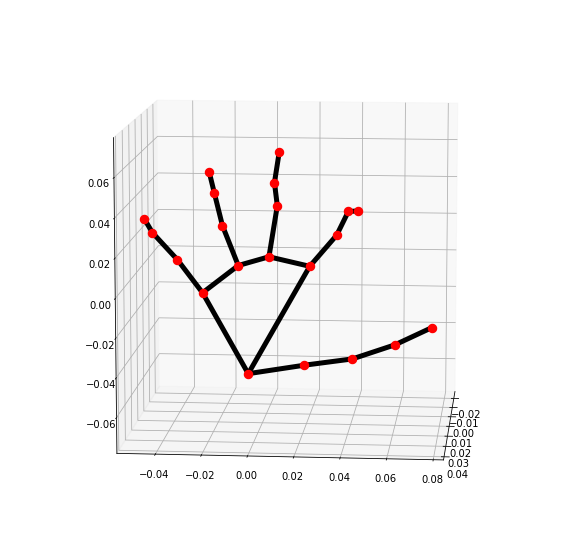

In [155]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ["hand.jpg"]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
      

# HOMEWORK
寫一個gradio的APP,輸入手的圖形後,輸出劃上關節點的手的圖形